In [130]:
import os # Used to get file sizes only
from PIL import Image

In [131]:
def imOpen(name):
  return Image.open(name, 'r').convert('L')

In [132]:
def toStrH(image):
  columns, rows = image.size
  encoding = 'H ' + str(columns) + ' ' + str(rows)
  
  for i in range(rows):
    currentSequencePixelValue = -1
    currentSequenceStart = -1;
    rowEncoding = ''
    firstEntry = True # Used for the first entry in the row, not to put space

    for j in range(columns):
      currentPixelValue = image.getpixel((j, i))

      if currentSequencePixelValue == -1:
        currentSequencePixelValue = currentPixelValue
        currentSequenceStart = j
        continue
      
      if currentPixelValue != currentSequencePixelValue:
        rowEncoding += (' ' if not firstEntry else '') + \
        str(currentSequencePixelValue) + \
        ' ' + \
        str(currentSequenceStart) + \
        ' ' + \
        str(j - 1)

        currentSequencePixelValue = currentPixelValue
        currentSequenceStart = j

        firstEntry = False
    
    rowEncoding += (' ' if not firstEntry else '') + \
    str(currentSequencePixelValue) + \
    ' ' + \
    str(currentSequenceStart)+ \
    ' ' + \
    str(columns - 1)

    encoding += '\n' + rowEncoding

  print('Number of characters present in horizontal encoding: ' + \
        str(len(encoding)))

  return encoding

In [133]:
def toStrV(image):
  columns, rows = image.size
  encoding = 'V ' + str(columns) + ' ' + str(rows)

  for j in range(columns):
    currentSequencePixelValue = -1
    currentSequenceStart = -1
    columnEncoding = ''
    firstEntry = True # Used for the first entry in the col, not to put space

    for i in range(rows):
      currentPixelValue = image.getpixel((j, i))

      if currentSequencePixelValue == -1:
        currentSequencePixelValue = currentPixelValue
        currentSequenceStart = i
        continue
      
      if currentPixelValue != currentSequencePixelValue:
        columnEncoding += (' ' if not firstEntry else '') + \
        str(currentSequencePixelValue) + \
        ' ' + \
        str(currentSequenceStart) + \
        ' ' + \
        str(i - 1)

        currentSequencePixelValue = currentPixelValue
        currentSequenceStart = i

        firstEntry = False

    columnEncoding += (' ' if not firstEntry else '') + \
    str(currentSequencePixelValue) + \
    ' ' + \
    str(currentSequenceStart) + \
    ' ' + \
    str(rows - 1)

    encoding += '\n' + columnEncoding

  print('Number of characters present in vertical encoding: ' + \
        str(len(encoding)))

  return encoding

In [134]:
def toFile(name, encoding):
  file = open(name, mode='w')
  file.write(encoding)
  file.close()

In [135]:
def toImg(name):
  file = open(name, mode='r')
  
  data = file.readlines()
  for i in range(len(data)):
    data[i] = data[i].rstrip()
  
  encodingMode = data[0].split(' ')[0]

  return (toImgH(data) if encodingMode == 'H' else toImgV(data))



In [136]:
def toImgH(data):
  encodingMode, columns, rows = data[0].split(' ')
  columns = int(columns)
  rows = int(rows)

  del data[0] # Remove Specifications line

  image = Image.new(mode='L', size=(columns, rows))

  currentRow = 0
  for line in data:
    lineData = list(map(int, line.split(' ')))
    entriesLength = len(lineData) // 3

    for i in range(entriesLength):
      pixelValue = lineData[3 * i]
      startIndex = lineData[3 * i + 1]
      endIndex = lineData[3 * i + 2] + 1

      for j in range(startIndex, endIndex):
        image.putpixel((j, currentRow), pixelValue)
    
    currentRow += 1
  
  return image

In [137]:
def toImgV(data):
  encodingMode, columns, rows = data[0].split(' ')
  columns = int(columns)
  rows = int(rows)

  del data[0] # Remove Specifications line

  image = Image.new(mode='L', size=(columns, rows))

  currentCol = 0
  for line in data:
    lineData = list(map(int, line.split(' ')))
    entriesLength = len(lineData) // 3

    for i in range(entriesLength):
      pixelValue = lineData[3 * i]
      startIndex = lineData[3 * i + 1]
      endIndex = lineData[3 * i + 2] + 1

      for j in range(startIndex, endIndex):
        image.putpixel((currentCol, j), pixelValue)
    
    currentCol += 1
  
  return image

In [138]:
# Bars.bmp
image = imOpen('Bars.bmp')
horizontalEncoding = toStrH(image)
verticalEncoding = toStrV(image)
toFile('H1.txt', horizontalEncoding)
toFile('V1.txt', verticalEncoding)

Number of characters present in horizontal encoding: 245354
Number of characters present in vertical encoding: 11309


In [139]:
# Sizes image, horizontal encoding, & vertical encoding of Bars.bmp
print('Size of Bars.bmp: ' + str(os.stat('Bars.bmp').st_size) + ' Bytes')
print('Size of horizontal compression of Bars.bmp: ' + \
      str(os.stat('H1.txt').st_size) + ' Bytes')
print('Size of vertical compression of Bars.bmp: ' + \
      str(os.stat('V1.txt').st_size) + ' Bytes')

Size of Bars.bmp: 2338038 Bytes
Size of horizontal compression of Bars.bmp: 245354 Bytes
Size of vertical compression of Bars.bmp: 11309 Bytes


In [140]:
# Bars2.bmp
image = imOpen('Bars2.bmp')
horizontalEncoding = toStrH(image)
verticalEncoding = toStrV(image)
toFile('H2.txt', horizontalEncoding)
toFile('V2.txt', verticalEncoding)

Number of characters present in horizontal encoding: 2877
Number of characters present in vertical encoding: 1624009


In [141]:
# Sizes image, horizontal encoding, & vertical encoding of Bars2.bmp
print('Size of Bars2.bmp: ' + str(os.stat('Bars2.bmp').st_size) + ' Bytes')
print('Size of horizontal compression of Bars2.bmp: ' + \
      str(os.stat('H2.txt').st_size) + ' Bytes')
print('Size of horizontal compression of Bars2.bmp: ' + \
      str(os.stat('V2.txt').st_size) + ' Bytes')

Size of Bars2.bmp: 450054 Bytes
Size of horizontal compression of Bars2.bmp: 2877 Bytes
Size of horizontal compression of Bars2.bmp: 1624009 Bytes


# Comments about the comperssion results
### Bars.bmp
For _Bars.bmp_ from an initial observation, we can conclude that using a vertical RLE compression would yield a better results than a horizontal RLE run. 

This is mainly due to the repeated pixel values being present column-wise, this causes a higher range between the start and end index of a certain sequence with a certain value.

Wherein during the horizontal RLE, since we have different gray values present this will causes a smaller range, making our output string larger in size.

This will result in a smaller _txt_ file size for the horizontal RLE run due to the number of character present in the file being smaller.

In the case of _Bars.bmp_ the vertical RLE has a lower byte size than both the horiznotal run and the image itself.
___
### Bars2.bmp
On the other hand _Bars2.bmp_ the pixel values are repeated row-wise which is the opposite of _Bars.bmp_.

This means that a horizontal RLE run will yield a better compression than a vertical run.

In the case of _Bars2.bmp_ the horizontal run will yield a better size result that the vertical and its size is smaller than the picture itself.

Not to mention since we have in this picture a high value of variability between the shades of gray, the file size of the vertical compression is much worse than that of the image itself.
___
### Conclusion
For an image, if a dimension (rows/columns) has a smaller variability between pixel values, then an RLE of the respective dimension would cause a good compression result compared to that of the opposite dimentsion. 

I.E if the pixel values of a certain image have repeated values in the rows then a horizontal RLE would yield a better result than that of a vertical RLE.

With that being said, it is also noted the RLE generally is a good compression method if there is a lot of repeated data present in an image.

But, once an image has an extensive amount of information with a lot of minute details it becomes an expensive method for compression; where the size of the compressed image might be higher than that of the original image itself _Like in the vertical run of Bars2.bmp_.

This problem may be more prominant in RGB picture more than gray scale since we have a higher variability of colors than that of a binary or a gray-scale image.

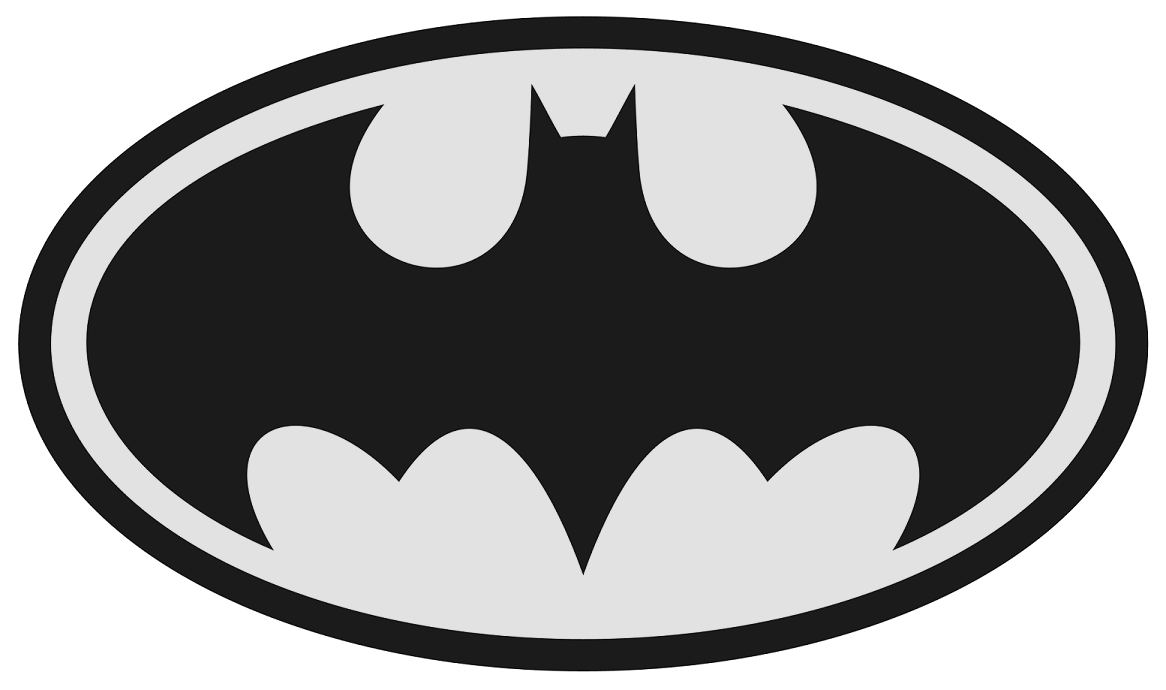

In [142]:
# Mystery1.txt
image = toImg('Mystery1.txt')
image.save('batman.bmp')
image

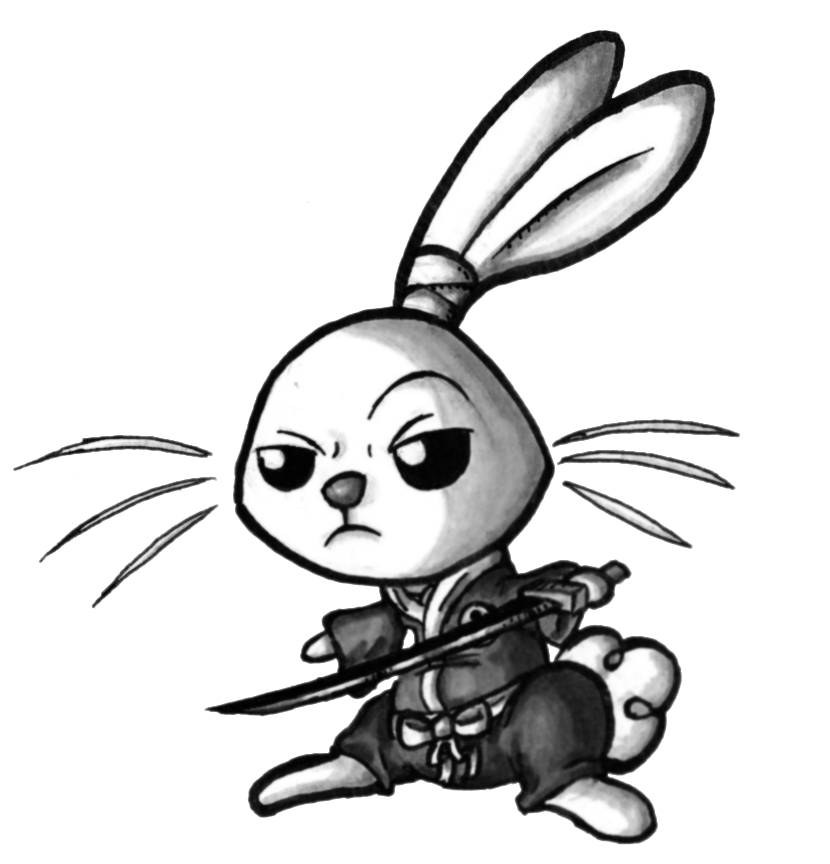

In [143]:
# Mystery2.txt
image = toImg('Mystery2.txt')
image.save('rabbit.bmp')
image